<a href="https://colab.research.google.com/github/DangPhan23/AI_W11_14_4_2023/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from keras.datasets import cifar10
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

In [51]:
import matplotlib.pyplot as plt
x_train =x_train.astype('float32')/255
from keras.utils import to_categorical # chuyen thanh 1 bit thanh 10 bit 
y_train = to_categorical(y_train,10)

In [52]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU,Activation,Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD

In [53]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='linear', input_shape=(32,32,3), padding='same')) #32 lan tich chap
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),padding='same')) #64 lan tich chap
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


In [60]:
sgd = SGD(lr =0.1, decay=1e-6, momentum =0.9, nesterov =True)
model.compile(loss=categorical_crossentropy,optimizer=SGD(),metrics=['accuracy'])
train=model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 6s 7ms/step - loss: 0.6236 - accuracy: 0.7801
Epoch 2/100
782/782 [==============================] - 6s 7ms/step - loss: 0.6096 - accuracy: 0.7837
Epoch 3/100
782/782 [==============================] - 6s 7ms/step - loss: 0.5965 - accuracy: 0.7893
Epoch 4/100
782/782 [==============================] - 6s 7ms/step - loss: 0.5851 - accuracy: 0.7932
Epoch 5/100
782/782 [==============================] - 5s 7ms/step - loss: 0.5729 - accuracy: 0.7964
Epoch 6/100
782/782 [==============================] - 6s 7ms/step - loss: 0.5659 - accuracy: 0.7990
Epoch 7/100
782/782 [==============================] - 5s 7ms/step - loss: 0.5524 - accuracy: 0.8051
Epoch 8/100
782/782 [==============================] - 6s 8ms/step - loss: 0.5433 - accuracy: 0.8068
Epoch 9/100
782/782 [==============================] - 5s 7ms/step - loss: 0.5318 - accuracy: 0.8126
Epoch 10/100
782/782 [==============================] - 6s 7ms/step - loss: 0.5198 - accura

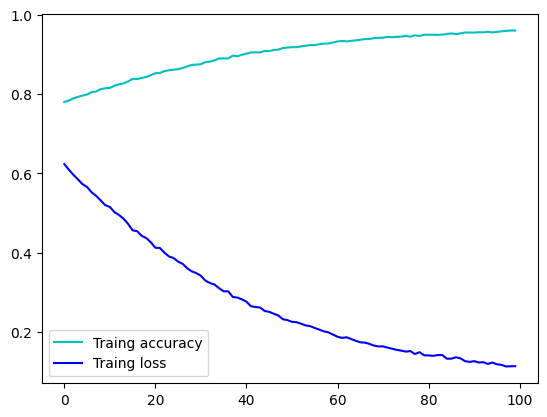

In [61]:
accuracy = train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'c',label='Traing accuracy')
plt.plot(epochs,loss,'b',label='Traing loss')
plt.legend()
plt.show()